# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Ames Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Ames Housing Data again!

We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ames = pd.read_csv('ames.csv')

In [2]:
# using 9 predictive categorical or continuous features, plus the target SalePrice
continuous = ['LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']
categoricals = ['BldgType', 'KitchenQual', 'SaleType', 'MSZoning', 'Street', 'Neighborhood']

ames_cont = ames[continuous]

In [3]:
# a dataframe of just the continuous variables
ames_cont

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,8450,856,1710,208500
1,9600,1262,1262,181500
2,11250,920,1786,223500
3,9550,961,1717,140000
4,14260,1145,2198,250000
...,...,...,...,...
1455,7917,953,1647,175000
1456,13175,2073,2073,210000
1457,9042,1188,2340,266500
1458,9717,1078,1078,142125


In [4]:
# log features
log_names = [f'{column}_log' for column in ames_cont.columns]
log_names

['LotArea_log', '1stFlrSF_log', 'GrLivArea_log', 'SalePrice_log']

In [6]:
ames_log = np.log(ames_cont)
ames_log
# a new dataframe of the log-transformed continious variables

,LotArea,1stFlrSF,GrLivArea,SalePrice
0,9.041922,6.752270,7.444249,12.247694
1,9.169518,7.140453,7.140453,12.109011
2,9.328123,6.824374,7.487734,12.317167
3,9.164296,6.867974,7.448334,11.849398
4,9.565214,7.043160,7.695303,12.429216
...,...,...,...,...
1455,8.976768,6.859615,7.406711,12.072541
1456,9.486076,7.636752,7.636752,12.254863
1457,9.109636,7.080026,7.757906,12.493130
1458,9.181632,6.982863,6.982863,11.864462


In [9]:
ames_log.columns = log_names
# changing the column names of the columns transformed variables, adding "_log" to the end 

In [10]:
# normalize (subract mean and divide by std)

def normalize(feature):
    return (feature - feature.mean()) / feature.std()

In [12]:
# transforming them again with the z-score

ames_log_norm = ames_log.apply(normalize)

ames_log_norm.head()

,LotArea_log,1stFlrSF_log,GrLivArea_log,SalePrice_log
0,-0.133185,-0.803295,0.529078,0.559876
1,0.113403,0.418442,-0.381715,0.212692
2,0.419917,-0.576363,0.659449,0.733795
3,0.103311,-0.439137,0.541326,-0.437232
4,0.878108,0.112229,1.281751,1.014303


In [14]:
# one hot encode categoricals
ames_ohe = pd.get_dummies(ames[categoricals], prefix=categoricals, drop_first=True)
ames_ohe.head()

,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,SaleType_CWD,SaleType_Con,SaleType_ConLD,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [16]:
# creating a new dataframe called preprossed with the two new dataframes
preprocessed = pd.concat([ames_log_norm, ames_ohe], axis=1)


In [17]:
# separating the new dataframe. X does not have the dependent variable. y only has the dependent variable. 
X = preprocessed.drop('SalePrice_log', axis=1)
y = preprocessed['SalePrice_log']

In [18]:
X.head()

,LotArea_log,1stFlrSF_log,GrLivArea_log,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,...,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker
0,-0.133185,-0.803295,0.529078,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.113403,0.418442,-0.381715,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,0.419917,-0.576363,0.659449,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0.103311,-0.439137,0.541326,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0.878108,0.112229,1.281751,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [21]:
y.head()

0    0.559876
1    0.212692
2    0.733795
3   -0.437232
4    1.014303
Name: SalePrice_log, dtype: float64

### Perform a train-test split

In [22]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
# A brief preview of our train test split
print(len(X_train), len(X_test), len(y_train), len(y_test))

1095 365 1095 365


### Apply your model to the train set

In [25]:
# Import and initialize the linear regression model class
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()

In [26]:
# Fit the model to train data
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate predictions on training and test sets

In [27]:
# Calculate predictions on training and test sets
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)

In [28]:
y_hat_train

array([-0.98175114,  0.15119324,  1.86325808, ...,  0.20958854,
       -1.27480501, -0.203873  ])

In [30]:
y_hat_test[0:10]

array([-0.371072  ,  1.82463739,  0.18771896,  0.3790794 ,  0.35893374,
        2.30775729, -0.91019128, -0.51800426,  0.60859045,  0.21721094])

### Calculate training and test residuals

In [31]:
# Calculate residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

In [32]:
train_residuals

323    -0.284231
60      0.285629
591    -0.633353
1369   -0.063695
1150    0.199655
          ...   
1285   -0.061902
531    -0.047499
371     0.748420
1294   -0.345122
497    -0.450812
Name: SalePrice_log, Length: 1095, dtype: float64

In [33]:
test_residuals

1028    0.786352
875     0.325057
949    -0.236470
1236    0.250545
820     0.125638
          ...   
396     0.210083
325     0.066986
1177   -0.225112
789     0.379608
389    -0.272449
Name: SalePrice_log, Length: 365, dtype: float64

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [34]:
# Import mean_squared_error from sklearn.metrics

from sklearn.metrics import mean_squared_error

In [35]:
# Calculate training and test MSE
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squarred Error:', train_mse)
print('Test Mean Squarred Error:', test_mse)

Train Mean Squarred Error: 0.16243788170747797
Test Mean Squarred Error: 0.16956995571654196


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

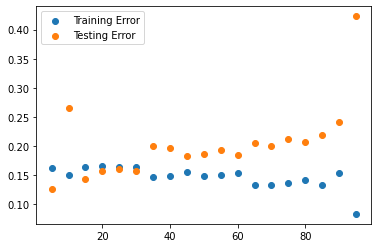

In [51]:
# Your code here
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 10 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

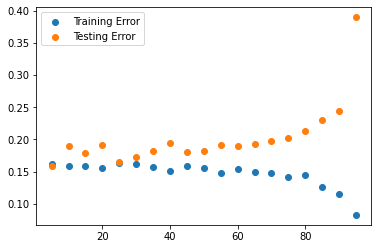

In [52]:
# Your code here
random.seed(900)

train_err = []
test_err = []
t_sizes = range(5,100,5)
for t_size in t_sizes:
    temp_train_err = []
    temp_test_err = []
    for i in range(10):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
        linreg.fit(X_train, y_train)
        y_hat_train = linreg.predict(X_train)
        y_hat_test = linreg.predict(X_test)
        temp_train_err.append(mean_squared_error(y_train, y_hat_train))
        temp_test_err.append(mean_squared_error(y_test, y_hat_test))
    train_err.append(np.mean(temp_train_err))
    test_err.append(np.mean(temp_test_err))
plt.scatter(t_sizes, train_err, label='Training Error')
plt.scatter(t_sizes, test_err, label='Testing Error')
plt.legend()

What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.